In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsRegressor
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [3]:
url='https://drive.google.com/file/d/1dyGflYAeAugtOxlHZwpVLkf84lO8a2KD/view?usp=drive_link'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)
df

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.000000,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000000,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,/aidan-simmons/profil/spieler/867763,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,...,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,/kusini-yengi/profil/spieler/708099,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,...,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,/nathanael-blair/profil/spieler/1023268,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,...,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,...,0.000000,0.000000,865,0,0,0,50000,50000,4,0


In [4]:
df.shape

(10754, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [6]:
df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [7]:
df.duplicated().sum() #kiểm tra và đếm số lượng dòng trùng lặp

0

In [39]:
# In ra giá trị lớn nhất của mỗi cột
print("Giá trị lớn nhất của các cột")
print(df.max())

# In ra giá trị nhỏ nhất của mỗi cột
print("Giá trị nhỏ nhất của các cột")
print(df.min())

Giá trị lớn nhất của các cột
player                 /zuko-mdunyelwa/profil/spieler/801354
team                                            Ümraniyespor
name                                              Ümit Akdag
position                              midfield-RightMidfield
height                                                 206.0
age                                                     43.0
appearance                                               107
goals                                                  11.25
assists                                                  4.0
yellow cards                                            30.0
second yellow cards                                      1.0
red cards                                           6.923077
goals conceded                                           9.0
clean sheets                                            90.0
minutes played                                          9510
days_injured                                            

In [9]:
print(df.describe())

             height           age    appearance         goals       assists  \
count  10754.000000  10754.000000  10754.000000  10754.000000  10754.000000   
mean     181.240353     26.041903     36.407011      0.125554      0.086978   
std        6.969818      4.777629     26.526541      0.235585      0.143351   
min      156.000000     15.000000      0.000000      0.000000      0.000000   
25%      176.000000     22.000000     12.000000      0.000000      0.000000   
50%      181.240353     26.000000     35.000000      0.045969      0.040773   
75%      186.000000     29.000000     59.000000      0.172263      0.133136   
max      206.000000     43.000000    107.000000     11.250000      4.000000   

       yellow cards  second yellow cards     red cards  goals conceded  \
count  10754.000000         10754.000000  10754.000000    10754.000000   
mean       0.189757             0.004666      0.006826        0.131655   
std        0.432388             0.025232      0.081143        0.44

#**Rừng ngẫu nhiên (Random Forest)**

**Chuẩn hóa dữ liệu**

In [10]:
# encoding
from sklearn.preprocessing import LabelEncoder

encoders = {}
text_features = ['player', 'name', 'team', 'position']
for feature in text_features:
    encoders[feature] = LabelEncoder()
    df[feature+"_encoded"] = encoders[feature].fit_transform(df[feature])


In [11]:
df


,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,player_encoded,name_encoded,team_encoded
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.000000,32.0,104,0.000000,0.000000,0.009585,...,42,5,13,15000000,70000000,9,0,2123,2088,226
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,0.069018,...,510,58,1,1500000,22000000,9,0,4195,4066,226
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,...,697,84,4,600000,6000000,9,0,9930,9692,226
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000000,25.0,82,0.028090,0.056180,0.224719,...,175,22,9,50000000,50000000,6,0,5929,5758,226
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,0.053667,...,238,51,21,40000000,80000000,6,0,8318,8092,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,/aidan-simmons/profil/spieler/867763,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,...,0,0,0,75000,75000,3,1,263,257,365
10750,/kusini-yengi/profil/spieler/708099,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,...,102,18,0,300000,300000,1,0,5690,5535,365
10751,/nathanael-blair/profil/spieler/1023268,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,...,0,0,0,50000,50000,1,0,7452,7272,365
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,...,0,0,0,50000,50000,1,0,10694,10443,365


#**Biểu đồ tương quan của các biến**

<Axes: >

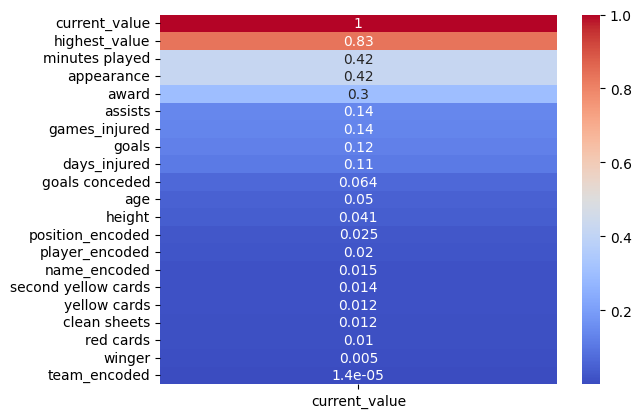

In [12]:
# feature selection
import seaborn as sns
df_cleaned = df.drop(columns=['player', 'name', 'team', 'position'], axis=1)
corr = df_cleaned.corr()['current_value'].abs().sort_values(ascending=False)
sns.heatmap(corr.to_frame(), annot=True, cmap='coolwarm' )


In [13]:
threshold = 0.005
corr = df_cleaned.corr()['current_value']
features_less_than_threshold = corr[abs(corr)<threshold].index
print(f"Removing these features: {features_less_than_threshold}")
df_cleaned.drop(columns=features_less_than_threshold, inplace=True)

Removing these features: Index(['team_encoded'], dtype='object')


In [14]:
# splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_cleaned.drop('current_value', axis=1), df_cleaned['current_value'], test_size= 0.2)

In [15]:
# train and test
from sklearn.pipeline import Pipeline #Kết hợp xử lí dữ liệu và mô hình
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", RandomForestRegressor(n_estimators=150))
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
r2_squared_score = r2_score(y_test, y_pred)
print(f"Root squared score with RandomForestRegressor is: {r2_squared_score}")

Root squared score with RandomForestRegressor is: 0.8886461526289645


#**linear regression**

In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
# Đọc dữ liệu từ file CSV
url='https://drive.google.com/file/d/1dyGflYAeAugtOxlHZwpVLkf84lO8a2KD/view?usp=drive_link'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

encoders = {}
text_features = ['player', 'name','team', 'position']
for feature in text_features:
    encoders[feature] = LabelEncoder()
    df[feature+"_encoded"] = encoders[feature].fit_transform(df[feature])

df_cleaned = df.drop(columns=['player', 'name','team', 'position'], axis=1)

# Chọn thuộc tính độc lập và biến phụ thuộc
X = df_cleaned[['highest_value', 'minutes played', 'appearance', 'award', 'assists', 'goals', 'age', 'height','position_encoded', 'player_encoded', 'name_encoded', 'winger', 'team_encoded']]

y = df_cleaned['current_value']  # Giá trị chuyển nhượng

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)


# Dự đoán giá trị chuyển nhượng trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình Root Mean Squared Error (RMSE) và R-squared (R2)o
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

RMSE: 4733030.72
R-squared: 0.75


In [17]:
df_cleaned

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,player_encoded,name_encoded,team_encoded
0,189.000000,32.0,104,0.000000,0.000000,0.009585,0.0,0.000000,1.217252,0.335463,...,42,5,13,15000000,70000000,9,0,2123,2088,226
1,196.000000,30.0,15,0.000000,0.000000,0.069018,0.0,0.000000,1.242331,0.207055,...,510,58,1,1500000,22000000,9,0,4195,4066,226
2,188.000000,37.0,4,0.000000,0.000000,0.000000,0.0,0.000000,0.616438,0.924658,...,697,84,4,600000,6000000,9,0,9930,9692,226
3,175.000000,25.0,82,0.028090,0.056180,0.224719,0.0,0.000000,0.000000,0.000000,...,175,22,9,50000000,50000000,6,0,5929,5758,226
4,191.000000,30.0,63,0.017889,0.017889,0.053667,0.0,0.000000,0.000000,0.000000,...,238,51,21,40000000,80000000,6,0,8318,8092,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,0.000000,0.000000,0.000000,...,0,0,0,75000,75000,3,1,263,257,365
10750,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,0.000000,0.000000,0.000000,...,102,18,0,300000,300000,1,0,5690,5535,365
10751,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,0.000000,0.000000,0.000000,...,0,0,0,50000,50000,1,0,7452,7272,365
10752,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,0.104046,0.000000,0.000000,...,0,0,0,50000,50000,1,0,10694,10443,365


**Kiểm tra rmse có hợp với data không**

In [18]:
#in ra một số thống kê mô tả của biến phụ thuộc y
print(y.describe())


count    1.075400e+04
mean     3.622971e+06
std      9.095410e+06
min      0.000000e+00
25%      3.000000e+05
50%      8.000000e+05
75%      3.000000e+06
max      1.800000e+08
Name: current_value, dtype: float64


In [19]:
value_range = y.max() - y.min()
print(f"Phạm vi giá trị: {value_range}")

Phạm vi giá trị: 180000000


In [20]:
#Sai số trung bình chuẩn (RMSE)
rmse_ratio = rmse / value_range
print(f"Tỷ lệ RMSE/Phạm vi giá trị: {rmse_ratio:.6f}")


Tỷ lệ RMSE/Phạm vi giá trị: 0.026295


**Text thêm một cầu thủ mới**

In [21]:
# Dự đoán giá chuyển nhượng cho cầu thủ mới
# Thay thế bằng các giá trị thuộc tính của cầu thủ mới
new_player_features = pd.DataFrame([[90000000, 9025, 105, 11, 0.289196676, 0.23933518, 28, 179, 3, 1406, 1344, 0, 226]],columns=['highest_value', 'minutes played', 'appearance', 'award', 'assists', 'goals', 'age', 'height','position_encoded', 'player_encoded', 'name_encoded', 'winger', 'team_encoded'])
# Sử dụng mô hình đã huấn luyện
predicted_transfer_fee = model.predict(new_player_features)
print(f"Predicted transfer fee for the new player: {predicted_transfer_fee[0]:.2f} million dollars")
#['highest_value', 'award', 'minutes played', 'age', 'appearance', 'goals', 'assists','position_encoded']

Predicted transfer fee for the new player: 54471574.59 million dollars


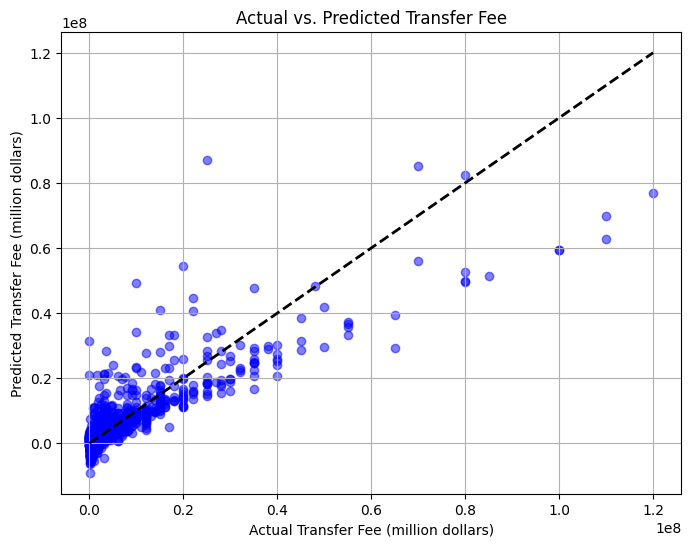

In [22]:
import matplotlib.pyplot as plt

# Dự đoán giá trị chuyển nhượng trên tập kiểm tra
y_pred = model.predict(X_test)

# Vẽ biểu đồ so sánh giá trị thực tế và giá trị dự đoán
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='b', alpha=0.5) #màu chữ - độ mờ

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual Transfer Fee (million dollars)')
plt.ylabel('Predicted Transfer Fee (million dollars)')
plt.title('Actual vs. Predicted Transfer Fee')
plt.grid(True) #Bật lưới cho biểu đồ
plt.show()


#**Regression Decision Tree**

In [23]:
url='https://drive.google.com/file/d/1dyGflYAeAugtOxlHZwpVLkf84lO8a2KD/view?usp=drive_link'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


**Chia dữ liệu huận luyện và dữ liệu thử nghiệm**



In [24]:
X = df.drop('current_value', axis=1) # Các biến độc lập
y = df['current_value'] # Biến phụ thuộc/mục tiêu

**Chuẩn hoá dữ liệu**

In [25]:
# Xác định các cột numerical và cột categorical
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X.select_dtypes(exclude=['number']).columns.tolist()

# Tiền xử lý dữ liệu numerical và categorical
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Áp dụng tiền xử lý dữ liệu bằng ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'
)

# Áp dụng tiền xử lý dữ liệu
X_preprocessed = preprocessor.fit_transform(X)
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


**Dữ liệu sau khi chuẩn hóa**

In [26]:
pd.DataFrame(X_preprocessed)

,0
0,"(0, 0)\t1.1133730718742276\n (0, 1)\t1.2471..."
1,"(0, 0)\t2.1177501292804517\n (0, 1)\t0.8285..."
2,"(0, 0)\t0.9698906351019099\n (0, 1)\t2.2937..."
3,"(0, 0)\t-0.8953810429382203\n (0, 1)\t-0.21..."
4,"(0, 0)\t1.4003379454188631\n (0, 1)\t0.8285..."
...,...
10749,"(0, 0)\t-2.527020174973852e-09\n (0, 1)\t-1..."
10750,"(0, 0)\t1.2568555086465454\n (0, 1)\t-0.427..."
10751,"(0, 0)\t-2.527020174973852e-09\n (0, 1)\t-1..."
10752,"(0, 0)\t-2.527020174973852e-09\n (0, 1)\t-1..."


**Modelling**

Decision Tree Regression

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)
# Khởi tạo và huấn luyện một đối tượng DecisionTreeRegressor
regression_tree = DecisionTreeRegressor(max_depth=8)
regression_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [28]:
# Dự đoán phí chuyển nhượng của các cầu thủ trong tập kiểm tra
y_pred = regression_tree.predict(X_test)

In [29]:
# Đánh giá hiệu suất của mô hình
mse = mean_squared_error(y_test, y_pred) # Sai số trung bình bình phương
r2 = r2_score(y_test, y_pred) # Hệ số xác định
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print("R-squared:", r2)

Root Mean Squared Error (RMSE): 3310560.522391336
R-squared: 0.8788096597390975


In [30]:
#Find the best max-depth for DT algorithm
# Define a range of max_depth values to iterate over
max_depth_values = range(3, 20)  # You can adjust this range

# Initialize variables to keep track of the best max depth and corresponding score
best_max_depth = None
best_score = 0.0

# Iterate over different max_depth values
for max_depth in max_depth_values:
    # Initialize the DecisionTreeRegressor with the current max_depth
    clf = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    # Fit the model to the training data
    clf.fit(X_train, y_train)
    # Evaluate the model on the test data
    y_pred2 = clf.predict(X_test)
    test_score = r2_score(y_test, y_pred2)
    # Perform cross-validation on the training data
    #cv_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    # Print the score for the current max_depth
    print(f"Max Depth = {max_depth}: Test Score = {test_score}")
    # Check if the current model has a better score than the previous best
    if test_score > best_score:
        best_score = test_score
        best_max_depth = max_depth

# Print the best max depth and corresponding score
print(f"Best Max Depth = {best_max_depth}: Best Test Score = {best_score}")

Max Depth = 3: Test Score = 0.7893604770146232
Max Depth = 4: Test Score = 0.8126326094079426
Max Depth = 5: Test Score = 0.8590221606890518
Max Depth = 6: Test Score = 0.8811341911101771
Max Depth = 7: Test Score = 0.8822290839838061
Max Depth = 8: Test Score = 0.8829118542277944
Max Depth = 9: Test Score = 0.8694409464828203
Max Depth = 10: Test Score = 0.8543512120526245
Max Depth = 11: Test Score = 0.8602368018227298
Max Depth = 12: Test Score = 0.8601346590443762
Max Depth = 13: Test Score = 0.8571450062539004
Max Depth = 14: Test Score = 0.8654462848046638
Max Depth = 15: Test Score = 0.8451370454434438
Max Depth = 16: Test Score = 0.853068712820561
Max Depth = 17: Test Score = 0.8614878176496095
Max Depth = 18: Test Score = 0.8637808190546585
Max Depth = 19: Test Score = 0.8596376651669198
Best Max Depth = 8: Best Test Score = 0.8829118542277944


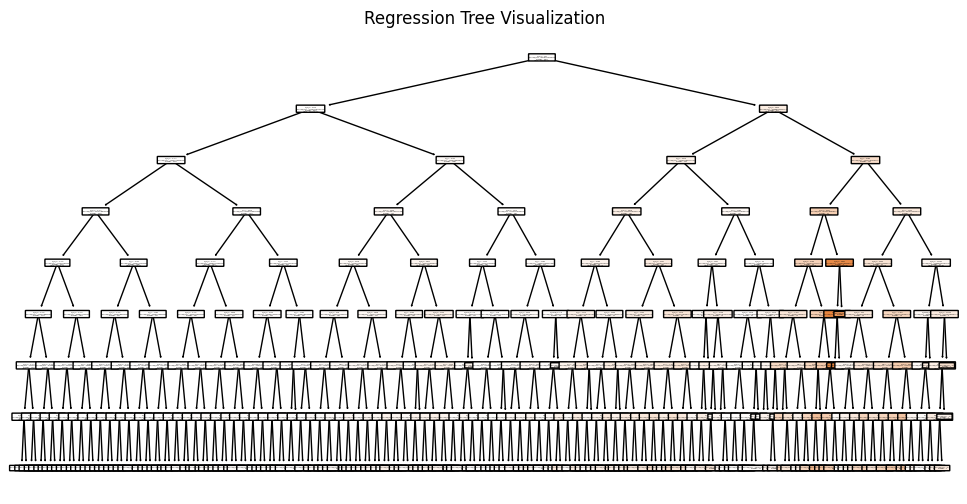

In [31]:
from sklearn.tree import plot_tree

# Visualize the regression tree
plt.figure(figsize=(12, 6))
plot_tree(regression_tree, filled=True, rounded=True)
plt.title("Regression Tree Visualization")
plt.show()

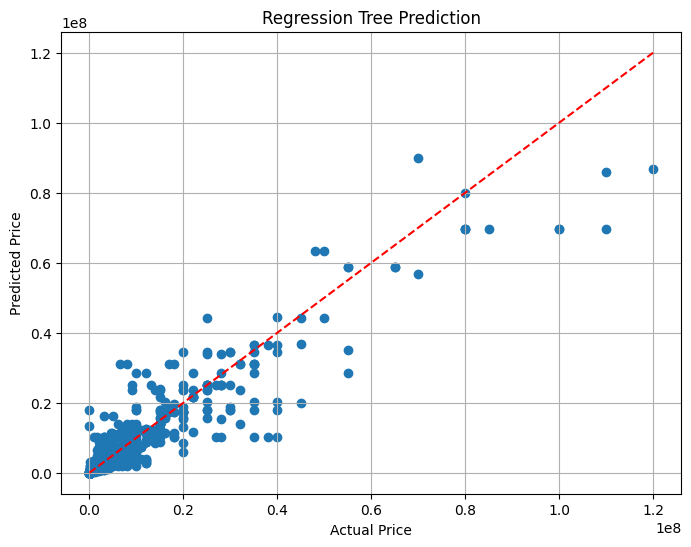

In [32]:
# Vẽ biểu đồ thể hiện mối quan hệ giữa giá thực tế và dự đoán
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred) # Vẽ các điểm dữ liệu
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red') # Vẽ đường tham chiếu y = x
plt.xlabel("Actual Price") # Đặt tên trục hoành
plt.ylabel("Predicted Price") # Đặt tên trục tung
plt.title("Regression Tree Prediction") # Đặt tên biểu đồ
plt.grid(True) #Bật lưới cho biểu đồ
plt.show() # Hiển thị biểu đồ

#**K-Nearest Neighbors**

**Phân tích dữ liệu thăm dò (EDA):**

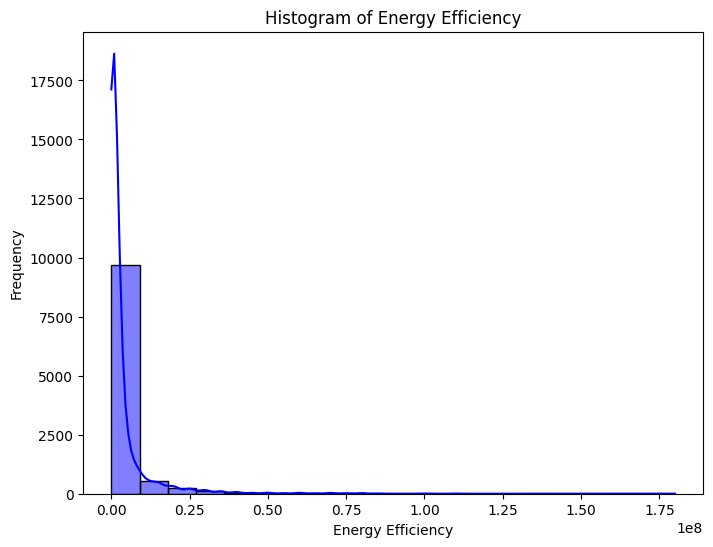

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(df['current_value'], kde=True, color='blue', bins=20)
plt.title('Histogram of Energy Efficiency')
plt.xlabel('Energy Efficiency')
plt.ylabel('Frequency')
plt.show()

<ipython-input-34-07f29dcdab93>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


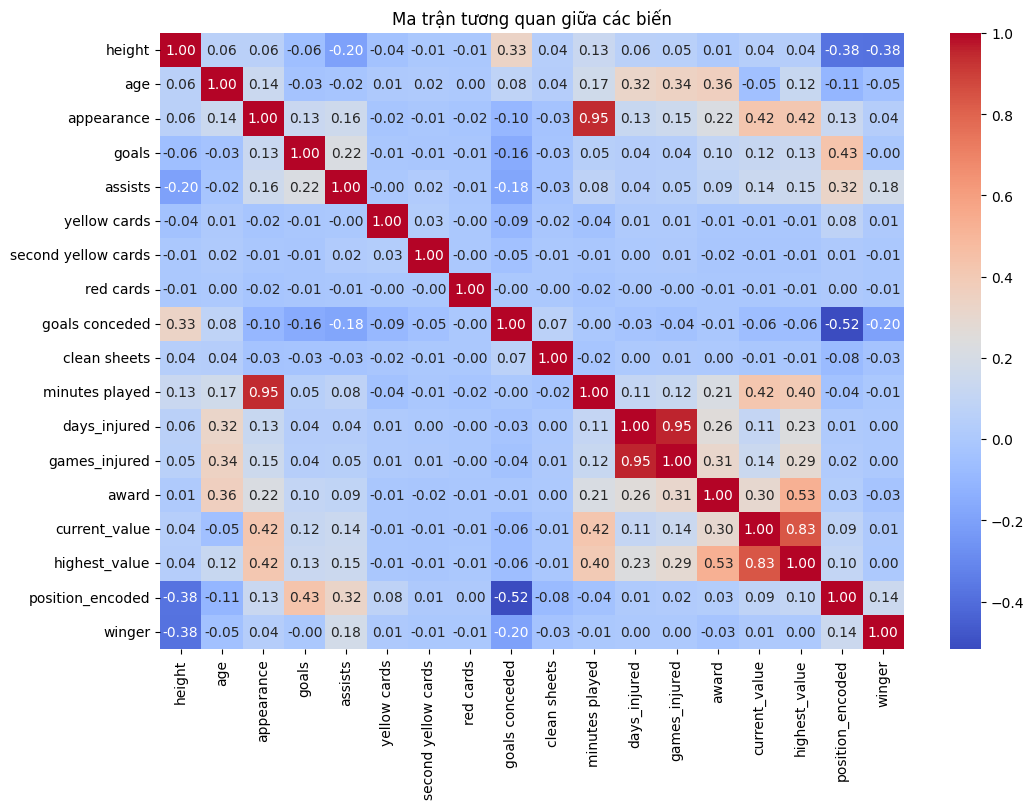

In [34]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma trận tương quan giữa các biến')
plt.show()

**Kỹ thuật tính năng**

In [35]:
correlation = df.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value          1.000000
highest_value          0.834553
minutes played         0.420542
appearance             0.419656
award                  0.300454
assists                0.137415
games_injured          0.135654
goals                  0.121574
days_injured           0.107686
position_encoded       0.085154
height                 0.040535
winger                 0.005034
red cards             -0.010171
clean sheets          -0.011684
yellow cards          -0.011766
second yellow cards   -0.013889
age                   -0.050156
goals conceded        -0.063529
Name: current_value, dtype: float64


<ipython-input-35-756081af6167>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


In [36]:
def correlation(dataset, threshold):
    col_corr = set()
    #Correlation của tập dữ liệu chỉ có giá trị số.
    corr_matrix = dataset.corr(numeric_only=True)
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            #Making một hình vuông j lần i và lưu trữ nó.
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

**Thuật Toán KNN**

In [37]:
# Xây dựng và huấn luyện mô hình KNN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
# Dự đoán trên tập kiểm tra
y_pred = knn_model.predict(X_test)
# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared Score: {r2}")

Root Mean Squared Error (RMSE): 4189727.5578291607
R-squared Score: 0.8058950960438741
